In [2]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
sys.path.append("..")
from partition import *
from constants import *
from opacity import *

In [3]:
df = pd.read_csv(r'..\aux_files\SolarAbundance.txt', sep='\t')

In [4]:
df = df.dropna()

In [5]:
df = df[(df['element'] != 'Li') & (df['element'] !='Cs')] 

In [6]:
A_array = 10**(df['logA'].values)

In [7]:
el_array = df['element']

In [8]:
# need to calculate Pe as a function of T

In [9]:
def Pe_iter(A_array, el_array, T, Pgas):
    """
    A function to get the electron pressure using Gray's equation 9.8
    """
    
    Pe_guess = min(Pgas/2.0, np.sqrt(Pgas*phi('H', T)))
    
    print(Pe_guess)

    phi_array = np.array([phi(i, T) for i in el_array])
    
    # then iteratively solve for best Pe
    f = lambda P: P-Pgas*np.sum(A_array*(phi_array/P)/(1+phi_array/P))/np.sum(A_array*(1+(phi_array/P)/(1+phi_array/P)))
    
    return fsolve(f, Pe_guess)[0]
    


In [10]:
# table 9.2 to check (starts on page 199)

In [12]:
np.sqrt(10**4.74*phi('H', 5294))

2.0565797314408227

In [11]:
Pe_iter(A_array, el_array, 5294, 10**4.74)

2.0565797314408227


5.658055569720465

In [11]:
np.log10(Pe_iter(A_array, el_array, 8811, 10**5.29))

C:\Users\Belles\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


3.448320158496539

In [12]:
np.log10(Pe_iter(A_array, el_array, 8811, 10**5.29))

3.448320158496539

In [13]:
3.42

3.42

In [14]:
np.log10(Pe_iter(A_array, el_array, 6429, 10**5.1))

1.741362562277197

In [15]:
1.78

1.78

In [16]:
np.log10(Pe_iter(A_array, el_array, 4310, 10**2.87))

-1.177804132959942

In [17]:
-1.16

-1.16

In [18]:
# part b

In [19]:
sum_A = np.sum(10**df['logA'].values[:30])
sum_A

1.0861892126128878

In [20]:
sum_Amu = np.sum(10**df['logA'].values[:30]*df['weight'][:30])
sum_Amu

1.3671669463109857

In [21]:
metals = df[df['atomic']>2]

In [22]:
sum_A_metals = np.sum(10**metals['logA'].values)
sum_A_metals

0.0010754152705808255

In [23]:
sum_Amu_metals = np.sum(10**metals['logA'].values*metals['weight'])
sum_Amu_metals

0.018457085663309617

In [24]:
plt.style.use('../../scripts/atmospheres.mplstyle')


Bad key "xticks.labelsize" on line 11 in
../../scripts/atmospheres.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "yticks.labelsize" on line 12 in
../../scripts/atmospheres.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


C:\Users\Belles\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


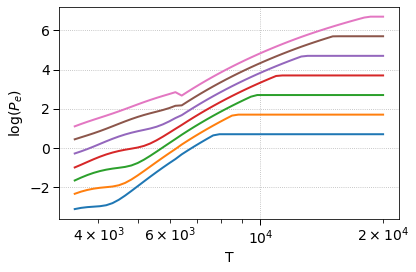

In [27]:
T_array = np.logspace(np.log10(3500), np.log10(20000), 50)
for i in range(1,8):
    Pgas = 10**i
    Pe_array = [np.log10(Pe_iter(A_array, el_array, T, Pgas)) for T in T_array]
    plt.plot(T_array, Pe_array)
plt.xlabel('T')
plt.ylabel(r'log($P_e$)')
plt.xscale('log')
plt.savefig('grey_figure9.7.pdf')